In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [152]:
df = pd.read_csv('HousingData.csv')

In [153]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [155]:
df['CRIM'].fillna(df['CRIM'].mean() , inplace = True)
df['ZN'].fillna(df['ZN'].mean() , inplace = True)
df['INDUS'].fillna(df['INDUS'].mean() , inplace = True)
df['CHAS'].fillna(df['CHAS'].mean() , inplace = True)
df['AGE'].fillna(df['AGE'].mean() , inplace = True)
df['LSTAT'].fillna(df['LSTAT'].mean() , inplace = True)


In [156]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [157]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [158]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# model = make_pipeline(StandardScaler(with_mean=False),LinearRegression())
# model.fit(X_train,y_train)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(X_train , y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [162]:
model.score(X_test,y_test)

0.6588520195508119

In [163]:
y_pred = model.predict(X_test)

In [164]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE 25.017672023842863
RMSE 5.00176689019419


In [166]:
print(y_test.shape)
print(y_pred.shape)

(102,)
(102,)


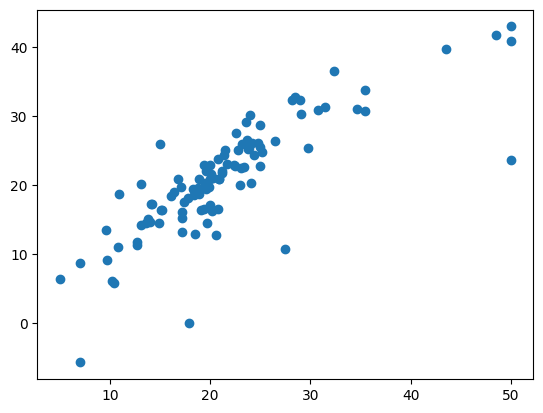

In [168]:
plt.scatter(y_test,y_pred)